In [1]:
%load_ext autoreload
%autoreload 2

# Example of a pvsystemprofiler function


## 8/10/2021

### Notebook setup and library imports

In [60]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# PVInsight Code Imports
sys.path.append('..')
sys.path.append('~/github/pv-system-profiler')
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data
from pvsystemprofiler.estimator import ConfigurationEstimator
from pvsystemprofiler.longitude_study import LongitudeStudy

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [3]:
data_frame = get_pvdaq_data(sysid=1199, year=[2015, 2016, 2017], api_key='DEMO_KEY')[0]

CAUTION: Multiple scan rates detected!=======================] 100.0% ...queries complete in 23.7 seconds       
Scan rates (in seconds): [300, 280]
0 transitions detected.
Suggest splitting data set between:




### Running the `DataHandler` processing pipeline

In [99]:
dh = DataHandler(data_frame)

In [100]:
dh.run_pipeline(power_col='ac_power', fix_shifts=False, correct_tz=True)

total time: 12.09 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.70s
Cleaning                   0.32s
Filtering/Summarizing      7.07s
    Data quality           0.42s
    Clear day detect       0.29s
    Clipping detect        5.06s
    Capacity change detect 1.30s



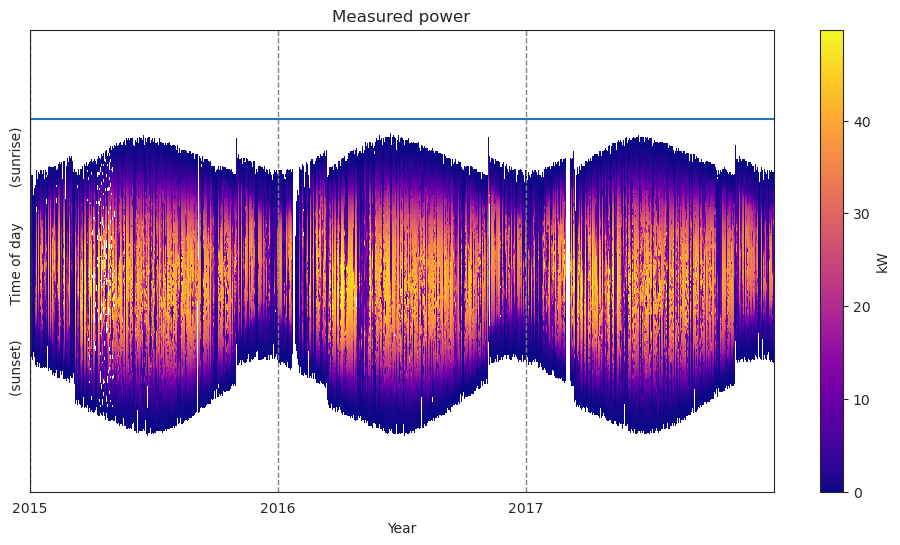

In [85]:
dh.plot_heatmap(matrix='raw')
plt.axhline(y=55)
plt.show()

In [112]:
dh = DataHandler(data_frame)

In [113]:
dh.run_pipeline(power_col='ac_power', fix_shifts=False, correct_tz=False)

total time: 12.21 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.77s
Cleaning                   0.32s
Filtering/Summarizing      7.12s
    Data quality           0.43s
    Clear day detect       0.29s
    Clipping detect        5.09s
    Capacity change detect 1.31s



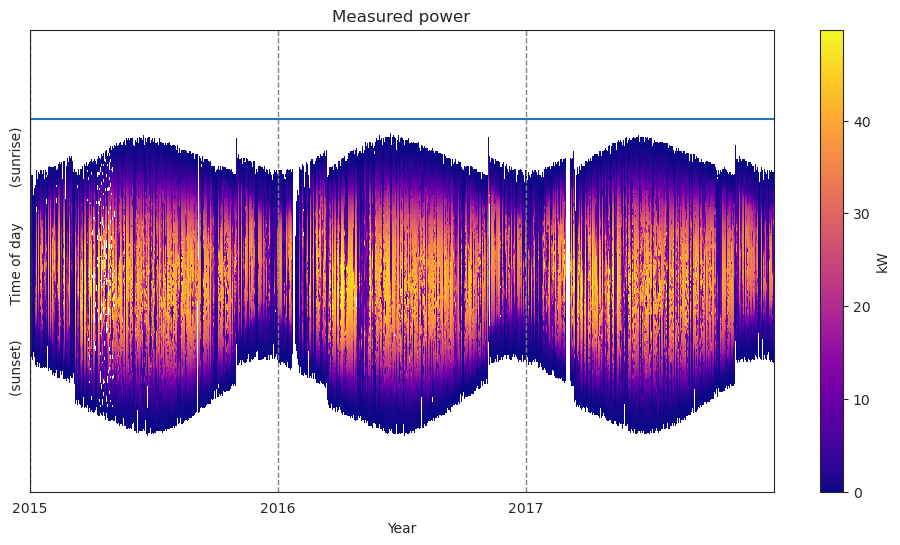

In [114]:
dh.plot_heatmap(matrix='raw')
plt.axhline(y=55)
plt.show()